Categories in 'gender' variable:      ['female' 'male  ']
Categories in 'race_ethnicity' variable:   [' "group B"       ' ' "group C"       ' ' "group A"       '
 ' "group D"       ' ' "group E"       ']
Categories in'parental level of education' variable: [' "bachelor\'s degree"          ' ' "some college"               '
 ' "master\'s degree"            ' ' "associate\'s degree"         '
 ' "high school"                ' ' "some high school"           ']
Categories in 'lunch' variable:      [' "standard"    ' ' "free/reduced"']
Categories in 'test preparation course' variable:      [' "none"                   ' ' "completed"              ']
Linear Regression
Training set:
  RMSE: 4.8946, MAE: 3.8474, R2: 0.8937
Test set:
  RMSE: 9.3390, MAE: 5.8710, R2: 0.6416
------------------------------
Lasso
Training set:
  RMSE: 13.8688, MAE: 11.1349, R2: 0.1468
Test set:
  RMSE: 14.9207, MAE: 11.7251, R2: 0.0851
------------------------------
Ridge
Training set:
  RMSE: 5.1900, MAE: 4.1101, R

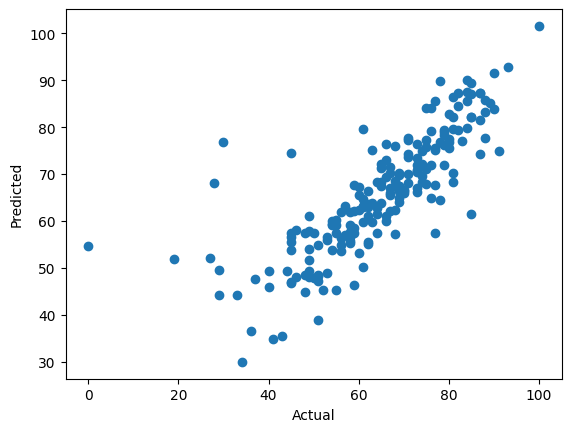

In [23]:
# Step1: Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('data/stud.csv')
# Clean column names: remove leading/trailing spaces and quotes
df.columns = df.columns.str.strip().str.replace('"', '').str.replace("'", '')

# Clean math_score column: remove spaces and quotes, convert to int
df['math_score'] = df['math_score'].astype(str).str.strip().str.replace('"', '').str.replace("'", '').astype(int)

df.head()
# | Index | gender | race_ethnicity | parental_level_of_education | lunch       | test_preparation_course | math_score | reading_score | writing_score |
# | ----- | ------ | -------------- | --------------------------- | ----------- | ----------------------- | ---------- | ------------- | ------------- |
# | 0     | Female | Group B        | Bachelor's degree           | Standard    | None                    | 72         | 72            | 74            |
# | 1     | Female | Group C        | Some college                | Standard    | Completed               | 69         | 90            | 88            |
# | 2     | Female | Group B        | Master's degree             | Standard    | None                    | 90         | 95            | 93            |
# | 3     | Male   | Group A        | Associate's degree          | Free/Reduced| None                    | 47         | 57            | 44            |
# | 4     | Male   | Group C        | Some college                | Standard    | None                    | 76         | 78            | 75            |

# 📚 Step 2: Define Features and Target
X = df.drop(columns=['math_score'], axis=1)
X.head()
# | Index | gender | race_ethnicity | parental_level_of_education | lunch        | test_preparation_course | reading_score | writing_score |
# | ----- | ------ | -------------- | --------------------------- | ------------ | ----------------------- | ------------- | ------------- |
# | 0     | Female | Group B        | Bachelor's degree           | Standard     | None                    | 72            | 74            |
# | 1     | Female | Group C        | Some college                | Standard     | Completed               | 90            | 88            |
# | 2     | Female | Group B        | Master's degree             | Standard     | None                    | 95            | 93            |
# | 3     | Male   | Group A        | Associate's degree          | Free/Reduced | None                    | 57            | 44            |
# | 4     | Male   | Group C        | Some college                | Standard     | None                    | 78            | 75            |
y = df['math_score']
y.head()
# 0     "72"        
# 1     "69"        
# 2     "90"        
# 3     "47"        
# 4     "76"        

print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

# Categories in 'gender' variable:      ['female' 'male']
# Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
# Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
#  'high school' 'some high school']
# Categories in 'lunch' variable:      ['standard' 'free/reduced']
# Categories in 'test preparation course' variable:      ['none' 'completed']

# 🛠️ Step : Build Preprocessing Pipeline
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)
# 🔄 Step : Transform the Data
X = preprocessor.fit_transform(X)
X.shape
# (1000, 166)

# 🔀 Step : Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape
# ((800, 166), (200, 166))


# 📊 Step : Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

# 🤖 Step : Train Multiple Models

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(f"{name}")
    model_list.append(name)
    
    print("Training set:")
    print(f"  RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2: {train_r2:.4f}")
    print("Test set:")
    print(f"  RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2: {test_r2:.4f}")
    print("-" * 30)
    
    r2_list.append(test_r2)

# Linear Regression
# Training set:
#   RMSE: 4.8946, MAE: 3.8474, R2: 0.8937
# Test set:
#   RMSE: 9.3390, MAE: 5.8710, R2: 0.6416
# ------------------------------
# Lasso
# Training set:
#   RMSE: 13.8688, MAE: 11.1349, R2: 0.1468
# Test set:
#   RMSE: 14.9207, MAE: 11.7251, R2: 0.0851
# ------------------------------
# Ridge
# Training set:
#   RMSE: 5.1900, MAE: 4.1101, R2: 0.8805
# Test set:
#   RMSE: 9.0496, MAE: 5.8631, R2: 0.6635
# ...
#   RMSE: 12.7999, MAE: 10.5242, R2: 0.2733
# Test set:
#   RMSE: 14.6121, MAE: 11.5210, R2: 0.1226

pd.DataFrame({'Model Name': model_list, 'R2_Score': r2_list}).sort_values('R2_Score', ascending=False)
# | Rank | Model Name              | R² Score |
# | ---- | ----------------------- | -------- |
# | 1    | Ridge                   | 0.663453 |
# | 2    | Linear Regression       | 0.641585 |
# | 3    | CatBoosting Regressor   | 0.559186 |
# | 4    | XGBRegressor            | 0.555127 |
# | 5    | Random Forest Regressor | 0.436968 |
# | 6    | K-Neighbors Regressor   | 0.178781 |
# | 7    | Decision Tree           | 0.170435 |
# | 8    | AdaBoost Regressor      | 0.139857 |
# | 9    | Lasso                   | 0.085118 |

# Linear Reg
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)
# Accuracy of the model is 64.16

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');



,Actual Value,Predicted Value,Difference
521,91,74.821494,16.178506
737,53,55.917935,-2.917935
740,80,77.443358,2.556642
660,74,74.852811,-0.852811
411,84,85.509695,-1.509695
...,...,...,...
408,52,45.412631,6.587369
332,62,63.412204,-1.412204
208,74,68.367081,5.632919
613,65,67.418646,-2.418646


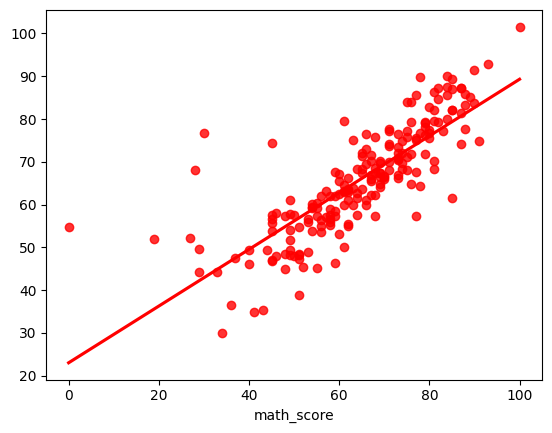

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df